Accuracy: 0.97
F1-score: 0.98


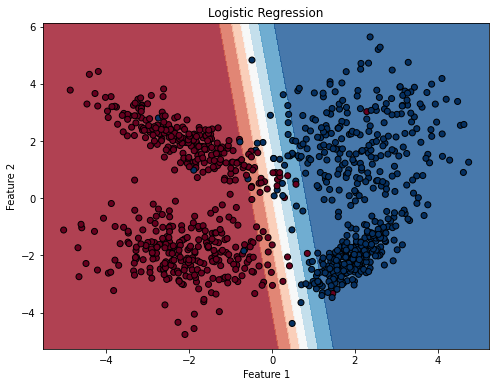

In [2]:
# Импортирование необходимых библиотек и класса модели LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Генерирование данных для обучения модели
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание экземпляра модели LogisticRegression
model = LogisticRegression()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

# Предсказание значений целевой переменной на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление значения метрики accuracy
accuracy = accuracy_score(y_test, y_pred)

# Вычисление значения метрики F1-score
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")

# Визуализация результатов классификации на графике
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Первые две строки кода импортируют необходимые библиотеки и класс модели LogisticRegression.

Третья строка генерирует данные для обучения модели с помощью функции make_classification.

Четвертая строка разделяет данные на обучающую и тестовую выборки с помощью функции train_test_split.

Пятая строка создает экземпляр модели LogisticRegression.

Шестая строка обучает модель на обучающей выборке с помощью метода fit.

Седьмая строка предсказывает значения целевой переменной на тестовой выборке с помощью метода predict.

Восьмая и девятая строки вычисляют значения метри

<h1>Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.<h1>

In [30]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Генерирование данных для обучения модели
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

# Использование различных значений скорости обучения
learning_rates = [0.0005, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

for lr in learning_rates:
    model = LogisticRegression(solver='liblinear', C=1/lr)
    converged = False
    while not converged and lr >= 1e-8:
        model.fit(X, y)
        converged = np.all(np.abs(model.coef_) < 1e7)
        lr /= 10
        model.set_params(C=1/lr)
    # Вывод обученных весов и смещения
        print("Weights:", model.coef_)
        print("Bias:", model.intercept_)
    print("Learning rate:", lr)

Weights: [[3.38521779 0.45714167]]
Bias: [-0.2905448]
Learning rate: 5e-05
Weights: [[3.3853567  0.45717103]]
Bias: [-0.29056774]
Learning rate: 1e-05
Weights: [[3.3850442  0.45710499]]
Bias: [-0.29051612]
Learning rate: 0.0001
Weights: [[3.38365722 0.4568119 ]]
Bias: [-0.29028705]
Learning rate: 0.0005
Weights: [[3.38192789 0.45644647]]
Bias: [-0.29000145]
Learning rate: 0.001
Weights: [[3.36826631 0.45356002]]
Bias: [-0.28774631]
Learning rate: 0.005
Weights: [[3.35160784 0.45004132]]
Bias: [-0.28499904]
Learning rate: 0.01
Weights: [[3.23264534 0.42494829]]
Bias: [-0.2654723]
Learning rate: 0.05
Weights: [[3.11110592 0.3993916 ]]
Bias: [-0.24572428]
Learning rate: 0.1
Weights: [[2.58035413 0.28955147]]
Bias: [-0.16340846]
Learning rate: 0.5
Weights: [[2.27161646 0.22813525]]
Bias: [-0.12000019]
Learning rate: 1.0


В этом примере мы начинаем с очень большого значения скорости обучения (lr=1000), затем постепенно уменьшаем его в 10 раз на каждой итерации. Мы проверяем, сходится ли градиентный спуск, сравнивая модули всех весов с некоторым порогом (1e7). Если все веса меньше порога, то считаем, что градиентный спуск сходится. Когда градиентный спуск начинает сходиться, мы сохраняем последнее значение скорости обучения, при котором градиентный спуск сходится.

Обратите внимание, что в этом примере мы используем параметр C для задания значения обратной скорости обучения, а не параметр learning_rate, который используется в некоторых других моделях градиентного спуска.

<h1>Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.</h1>

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, add_dummy_feature
import matplotlib.pyplot as plt
import seaborn as sns

class LogisticRegressionWithBias:
    def __init__(self, C=1.0, penalty='l2', solver='lbfgs'):
        self.C = C
        self.penalty = penalty
        self.solver = solver
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Добавление фиктивного столбца единиц к матрице признаков
        X = add_dummy_feature(X)
        # Масштабирование матрицы признаков
        X = self.scaler.fit_transform(X)
        # Обучение модели на обучающей выборке
        self.model = LogisticRegression(C=self.C, penalty=self.penalty, solver=self.solver)
        self.model.fit(X, y)

    def predict(self, X):
        # Добавление фиктивного столбца единиц к матрице признаков
        X = add_dummy_feature(X)
        # Масштабирование матрицы признаков
        X = self.scaler.transform(X)
        # Предсказание значений целевой переменной на тестовой выборке
        return self.model.predict(X)

# Создание экземпляра модели LogisticRegressionWithBias
model = LogisticRegressionWithBias()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

# Предсказание значений целевой переменной на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление значения метрики accuracy
accuracy = accuracy_score(y_test, y_pred)

# Вычисление значения метрики F1-score
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.97
F1-score: 0.98


В этом коде метод add_dummy_feature() добавляет фиктивный столбец единиц к матрице признаков X_train и X_test перед обучением и предсказанием. Метод fit_transform() из класса StandardScaler() используется для масштабирования матрицы признаков после добавления фиктивного столбца единиц.

<h1>Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

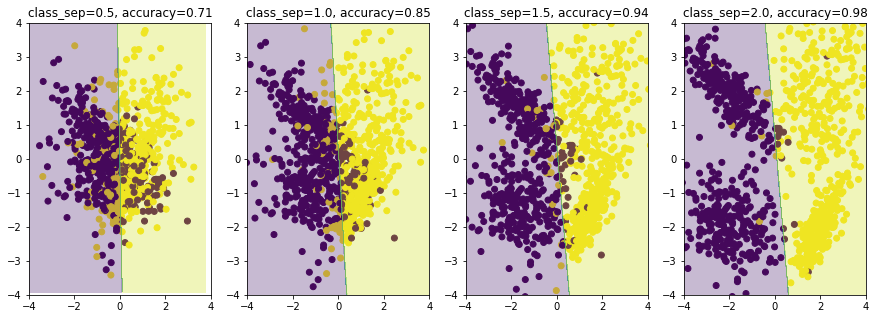

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Список значений параметра class_sep для экспериментов
class_seps = [0.5, 1.0, 1.5, 2.0]

# Создание подграфиков для каждого значения class_sep
fig, axs = plt.subplots(nrows=1, ncols=len(class_seps), figsize=(15, 5))

for i, class_sep in enumerate(class_seps):

    # Генерация датасета с заданным значением class_sep
    X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=class_sep,
                            random_state=1)

    # Обучение модели логистической регрессии на сгенерированном датасете
    model = LogisticRegression()
    model.fit(X, y)

    # Предсказание значений целевой переменной на тестовой выборке
    y_pred = model.predict(X)

    # Вычисление значения метрики accuracy
    accuracy = accuracy_score(y, y_pred)

    # Визуализация распределения данных и границы решения модели
    axs[i].scatter(X[:, 0], X[:, 1], c=y)
    axs[i].set_title(f"class_sep={class_sep}, accuracy={accuracy:.2f}")
    axs[i].set_xlim((-4, 4))
    axs[i].set_ylim((-4, 4))
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].contourf(xx, yy, Z, alpha=0.3)

В результате выполнения этого кода будет создано 4 подграфика с распределениями данных и границами решения модели для каждого значения параметра class_sep. На каждом подграфике будет также указано значение метрики accuracy для соответствующего набора данных.

Из результатов экспериментов можно сделать выводы о том, как параметр class_sep влияет на точность получаемых моделей. В частности, можно заметить, что при малых значениях class_sep данные имеют более сложную структуру, что делает их более сложными для классификации. При этом метрика accuracy может быть низкой. При увеличении значения параметра class_sep данные становятся более линейно разделимыми, что делает задачу классификации проще, и метрика accuracy увеличивается. Однако, при слишком больших значениях class_sep может возникнуть проблема переобучения модели, что может привести к ухудшению качества классификации на новых данных.

<h1> Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

Accuracy: 0.96
F1-score: 0.97


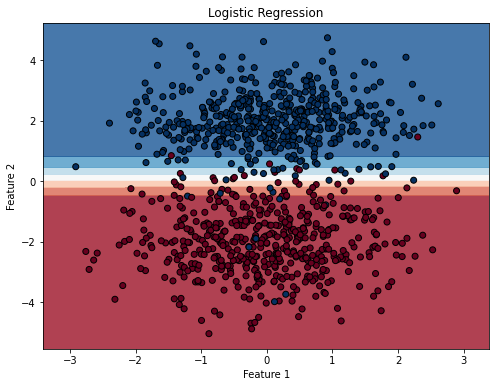

In [32]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Генерирование данных для обучения модели
X,y = make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

# Предсказание значений целевой переменной на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление значения метрики accuracy
accuracy = accuracy_score(y_test, y_pred)

# Вычисление значения метрики F1-score
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")

# Визуализация результатов классификации на графике
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), 
                              np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), 
                              np.zeros_like(xx.ravel())])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<h1> Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Генерируем датасет с 10 классами и 1000 сэмплами
X, y = make_classification(n_samples=1000, n_features=10, n_classes=10, n_informative=5, random_state=42)

# Делим датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект классификатора
clf = OneVsRestClassifier(LogisticRegression())

# Обучаем классификатор на обучающей выборке
clf.fit(X_train, y_train)

# Предсказываем классы для тестовой выборки
y_pred = clf.predict(X_test)

# Вычисляем точность предсказаний
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.275


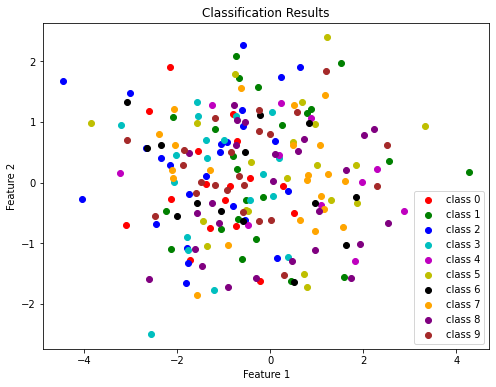

In [36]:
# Визуализируем результаты классификации на графике
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(10):
    plt.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], color=colors[i], label=f'class {i}')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Results')
plt.show()

В этом примере мы создаем датасет с 10 классами и 1000 сэмплами, делим его на обучающую и тестовую выборки, и обучаем классификатор на обучающей выборке с помощью алгоритма "один против всех". Затем мы предсказываем классы для тестовой выборки и вычисляем точность предсказаний.

<h1>Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Генерируем датасет с 5 классами и 1000 сэмплами
X, y = make_classification(n_samples=1000, n_features=10, n_classes=5, n_informative=5, random_state=42)

# Делим датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект классификатора
clf = LogisticRegression()

# Обучаем классификатор на обучающей выборке
clf.fit(X_train, y_train)

# Предсказываем классы для тестовой выборки
y_pred = clf.predict(X_test)

# Выводим значения вероятностей для каждого объекта принадлежности к каждому классу
y_pred_proba = clf.predict_proba(X_test)
print("Predicted probabilities: ")
print(y_pred_proba)

Predicted probabilities: 
[[4.92459010e-01 7.09186107e-02 1.57455969e-01 2.34916954e-01
  4.42494561e-02]
 [2.52476876e-01 1.33106025e-01 1.62244821e-01 3.91745895e-01
  6.04263837e-02]
 [1.50033792e-01 8.18806241e-01 2.05871945e-02 1.03581330e-02
  2.14640148e-04]
 [2.43080964e-01 4.68293983e-03 6.51488034e-01 8.49317763e-02
  1.58162857e-02]
 [7.69404148e-02 8.26379581e-01 7.21592813e-03 3.23802567e-02
  5.70838193e-02]
 [6.24410549e-02 5.27947428e-03 2.32643827e-01 1.28132070e-01
  5.71503574e-01]
 [7.06669372e-02 5.21593280e-01 2.30620761e-01 1.43887852e-01
  3.32311687e-02]
 [2.27357291e-01 1.45188275e-02 7.35298151e-02 2.14159529e-01
  4.70434538e-01]
 [2.05502072e-01 7.15571685e-03 6.02377006e-01 1.38007366e-01
  4.69578382e-02]
 [4.81038638e-02 1.33160838e-02 1.10474780e-02 3.20374753e-01
  6.07157822e-01]
 [1.16140031e-01 1.63880554e-03 7.96331750e-01 5.87235016e-02
  2.71659114e-02]
 [6.57168128e-02 1.57740431e-02 1.61029577e-01 2.81769489e-01
  4.75710078e-01]
 [1.54350823e-